# L-SHADE

In [1]:
from scipy.stats import wilcoxon
import pandas as pd
import numpy as np

from lshade import parse_results, analyze_results, plot_results, METHODS

In [2]:
errors = []

### Linear congruential

In [3]:
filename = "results/linear_congruential.txt"
lcg_results = parse_results(filename)

summary, lcg_errors = analyze_results(lcg_results)
errors.append(lcg_errors)
summary

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,100.000000,0.000000,100.000000,100.000000,0.000000,10,51
1,F2,1110.177050,7.044749,1100.327760,1133.696370,0.006346,10,51
2,F3,712.186209,0.572875,710.673429,713.597538,0.000804,10,51
3,F4,1900.399490,0.073977,1900.247250,1900.540720,0.000039,10,51
4,F5,1701.016090,0.769466,1700.208140,1703.979830,0.000452,10,51
5,F6,1600.437110,0.250964,1600.005510,1601.207690,0.000157,10,51
6,F7,2100.370940,0.253271,2100.000260,2101.122800,0.000121,10,51
7,F8,2298.039220,13.864839,2200.000000,2300.000000,0.006033,10,51
8,F9,2682.117010,94.581860,2500.000000,2737.546300,0.035264,10,51
9,F10,2911.394640,20.737331,2897.742870,2945.801970,0.007123,10,51


### Mersenne Twister

In [4]:
filename = "results/mersenne_twister.txt"
mt_results = parse_results(filename)

summary, mt_errors = analyze_results(mt_results)
errors.append(mt_errors)
summary

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,100.000000,0.000000,100.000000,100.000000,0.000000,10,51
1,F2,1109.213690,6.624903,1100.240890,1126.100080,0.005973,10,51
2,F3,712.178719,0.734390,710.795389,714.081097,0.001031,10,51
3,F4,1900.388890,0.074920,1900.211520,1900.563280,0.000039,10,51
4,F5,1701.094540,0.954338,1700.000000,1704.604260,0.000561,10,51
5,F6,1600.467540,0.242845,1600.020020,1601.194350,0.000152,10,51
6,F7,2100.357260,0.287937,2100.000010,2100.812170,0.000137,10,51
7,F8,2300.013450,0.067473,2300.000000,2300.398200,0.000029,10,51
8,F9,2695.139410,84.001297,2500.000000,2735.344410,0.031168,10,51
9,F10,2916.967050,22.663351,2898.008990,2945.801970,0.007769,10,51


### True random

In [5]:
filename = "results/true_random.txt"
true_results = parse_results(filename)

summary, true_errors = analyze_results(true_results)
errors.append(true_errors)
summary

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,100.000000,0.000000,100.000000,100.000000,0.000000,10,51
1,F2,1109.523500,6.522684,1100.197390,1142.104610,0.005879,10,51
2,F3,712.307744,0.837140,711.191023,715.421573,0.001175,10,51
3,F4,1900.397220,0.063255,1900.231160,1900.535420,0.000033,10,51
4,F5,1701.509180,2.275845,1700.000000,1712.376060,0.001338,10,51
5,F6,1600.378080,0.225829,1600.018270,1600.989120,0.000141,10,51
6,F7,2100.327560,0.265092,2100.000200,2100.812130,0.000126,10,51
7,F8,2298.039220,13.864839,2200.000000,2300.000000,0.006033,10,51
8,F9,2687.794280,88.317657,2500.000000,2735.702940,0.032859,10,51
9,F10,2911.337260,20.659100,2897.742870,2943.373120,0.007096,10,51


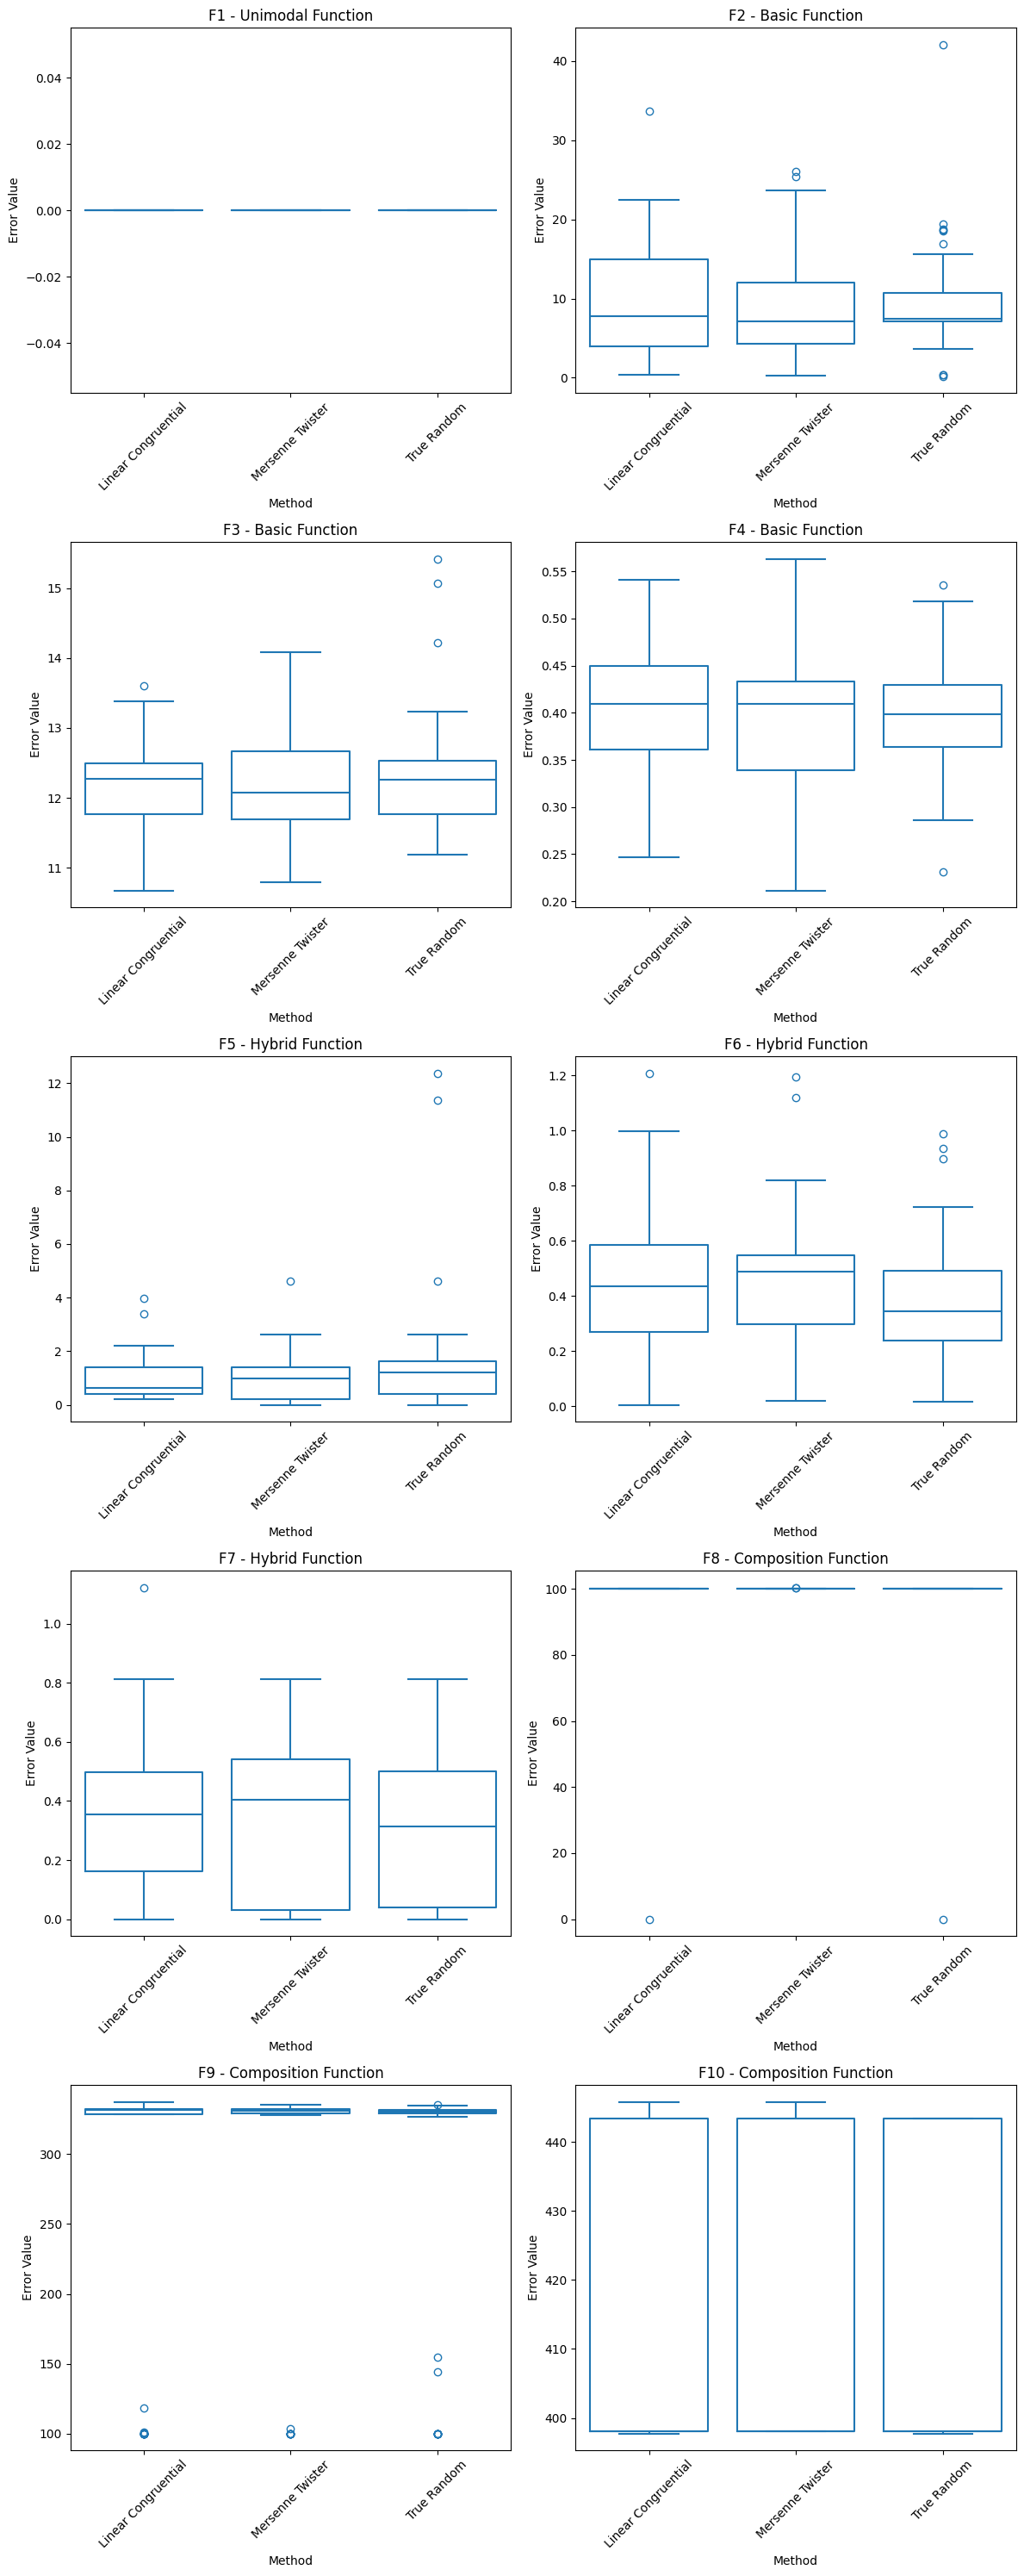

In [6]:
all_errors = []
for i, df in enumerate(errors):
    df_copy = df.copy()
    df_copy["Method"] = METHODS[i]
    all_errors.append(df_copy)

combined_errors = pd.concat(all_errors, ignore_index=True)
plot_results(combined_errors, "../imgs/box_lshade.png")

### Wilcoxon signed-rank test

In [7]:
lcg = [np.array(lcg_results[i]["error_values"]) for i in range(1, 11)]
mt = [np.array(mt_results[i]["error_values"]) for i in range(1, 11)]
true = [np.array(true_results[i]["error_values"]) for i in range(1, 11)]

In [8]:
for i in range(1, 10):
    print(f"--- Function {i+1} ---")

    res = wilcoxon(true[i], lcg[i])
    print(f"\tTrue Random vs Linear Congruential: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}")
    res = wilcoxon(true[i], mt[i])
    print(f"\tTrue Random vs Mersenne-Twister: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}")
    res = wilcoxon(lcg[i], mt[i])
    print(f"\tLinear Congruential vs Mersenne-Twister: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}\n")

--- Function 2 ---
	True Random vs Linear Congruential: statistic = 559.00, p-value = 0.33
	True Random vs Mersenne-Twister: statistic = 637.00, p-value = 0.81
	Linear Congruential vs Mersenne-Twister: statistic = 560.00, p-value = 0.33

--- Function 3 ---
	True Random vs Linear Congruential: statistic = 620.00, p-value = 0.69
	True Random vs Mersenne-Twister: statistic = 583.00, p-value = 0.45
	Linear Congruential vs Mersenne-Twister: statistic = 648.00, p-value = 0.89

--- Function 4 ---
	True Random vs Linear Congruential: statistic = 654.00, p-value = 0.93
	True Random vs Mersenne-Twister: statistic = 575.00, p-value = 0.41
	Linear Congruential vs Mersenne-Twister: statistic = 579.00, p-value = 0.43

--- Function 5 ---
	True Random vs Linear Congruential: statistic = 528.50, p-value = 0.54
	True Random vs Mersenne-Twister: statistic = 499.50, p-value = 0.65
	Linear Congruential vs Mersenne-Twister: statistic = 533.00, p-value = 0.74

--- Function 6 ---
	True Random vs Linear Congru